1. Use trends.csv file and matplotlib.pylab.csv2rec to import the data and reproduce this plot: 

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
trends = plt.csv2rec('trends.csv')

In [3]:
trends.dtype

dtype((numpy.record, [('week_start', 'O'), ('week_end', 'O'), ('textbooks', '<i8'), ('spring_break', '<i8'), ('kayak', '<i8'), ('skiing', '<i8'), ('global_warming', '<i8')]))

## I. Plot trends in single frame, with legend

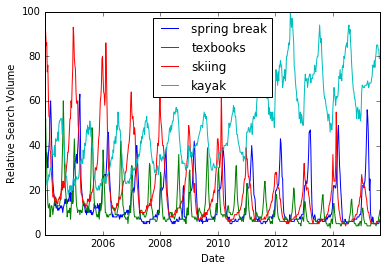

In [4]:
f, ax = plt.subplots() 
ax.plot(trends.week_start, trends.spring_break, label='spring break')
ax.plot(trends.week_start, trends.textbooks, label='texbooks')
ax.plot(trends.week_start, trends.skiing, label='skiing')
ax.plot(trends.week_start, trends.kayak, label='kayak')
ax.set_xlabel("Date")
ax.set_ylabel("Relative Search Volume")
ax.legend(loc="upper center")

**II. Determine maxima and minima of each trend term**

Create vector of year and week numbers

In [24]:
dates = trends.week_start
yrs = np.zeros_like(dates)
wks = np.zeros_like(dates)
for i in range(len(dates)):
    yrs[i] = dates[i].year
    wks[i] = dates[i].isocalendar()[1]

## 2.
determine in which week of each year (for all five search trends including "global warming") that search reached its peak and its minimum.  Are there any trends you can spot with any of the terms?

In [59]:
for name in trends.dtype.names:
    if name in ["week_start","week_end"]:
        continue
    print("\n",name,"\n","-"*50)
    trend = trends[name]
    for yr in range(2004,2014):
        ## get the trend info for just this year
        trend_year = trend[np.where(yrs == yr)]
        wks_year   = wks[np.where(yrs == yr)]
        print(yr, "max=",np.amax(trend_year),"@ week =",
              wks[np.argmax(trend_year)],
              "min=",np.amin(trend_year),"@ week =",
              wks[np.argmin(trend_year)])


 textbooks 
 --------------------------------------------------
2004 max= 60 @ week = 34 min= 7 @ week = 47
2005 max= 48 @ week = 34 min= 7 @ week = 47
2006 max= 42 @ week = 34 min= 5 @ week = 47
2007 max= 32 @ week = 33 min= 6 @ week = 44
2008 max= 36 @ week = 34 min= 5 @ week = 47
2009 max= 39 @ week = 34 min= 6 @ week = 15
2010 max= 31 @ week = 34 min= 6 @ week = 44
2011 max= 24 @ week = 34 min= 5 @ week = 44
2012 max= 21 @ week = 34 min= 4 @ week = 47
2013 max= 18 @ week = 34 min= 3 @ week = 47

 spring_break 
 --------------------------------------------------
2004 max= 60 @ week = 11 min= 10 @ week = 33
2005 max= 63 @ week = 12 min= 9 @ week = 24
2006 max= 46 @ week = 11 min= 7 @ week = 32
2007 max= 40 @ week = 10 min= 5 @ week = 22
2008 max= 38 @ week = 10 min= 5 @ week = 22
2009 max= 42 @ week = 10 min= 5 @ week = 25
2010 max= 39 @ week = 10 min= 5 @ week = 23
2011 max= 40 @ week = 10 min= 5 @ week = 27
2012 max= 43 @ week = 10 min= 5 @ week = 25
2013 max= 47 @ week = 11 min= 

## 3. 
which term has the largest scatter about it's median value? which term has the smallest scatter?


In [63]:
def std_median(datums):
    return np.sqrt( np.sum( (datums - np.median(datums))**2 ) )

In [66]:
for name in trends.dtype.names:
    if name in ["week_start","week_end"]:
        continue
    print("\n",name,"\n","-"*15)
    print(std_median(trends[name]))


 textbooks 
 ---------------
205.684223994

 spring_break 
 ---------------
310.621956726

 kayak 
 ---------------
462.606744439

 skiing 
 ---------------
449.831079406

 global_warming 
 ---------------
305.695927353


## 4. 
Determine the time lag, in units of weeks, that maximizes the cross-correlation between "skiing" and "spring break".  Do this also for "skiing" and "global warming"

-6.5


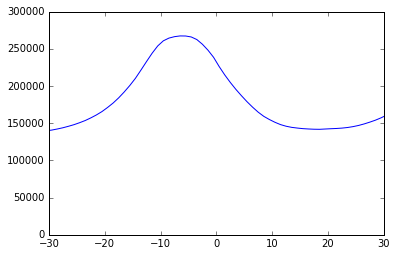

In [5]:
result = np.correlate(trends.skiing,trends.spring_break, mode='full')
gap = np.arange(result.size) - result.size/2
plt.plot(gap,result)
plt.xlim(-30,30)
print(gap[np.argmax(result)])

skiing preceeds spring break by about 6.5 weeks

-61.5


(-90, 60)

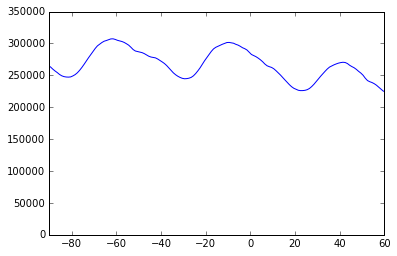

In [76]:
result = np.correlate(trends.skiing,trends.global_warming, mode='full')
gap = np.arange(result.size) - result.size/2
plt.plot(gap,result)
print(gap[np.argmax(result)])
plt.xlim(-90,60)


skiing preceeds global warming by 1 year, 10 weeks